In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
df=pd.read_csv("lc_loan.csv",low_memory=False)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
original_df=df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

## Rename Few columns

In [6]:
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})
# Drop irrelevant columns
df.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

## Exploratory Data Anaysis

Questions to be asked

1.What amount was mostly issued to the borrowers

2.which year was the most loans issued

Text(0.5, 1.0, 'Amount funded by the investors')

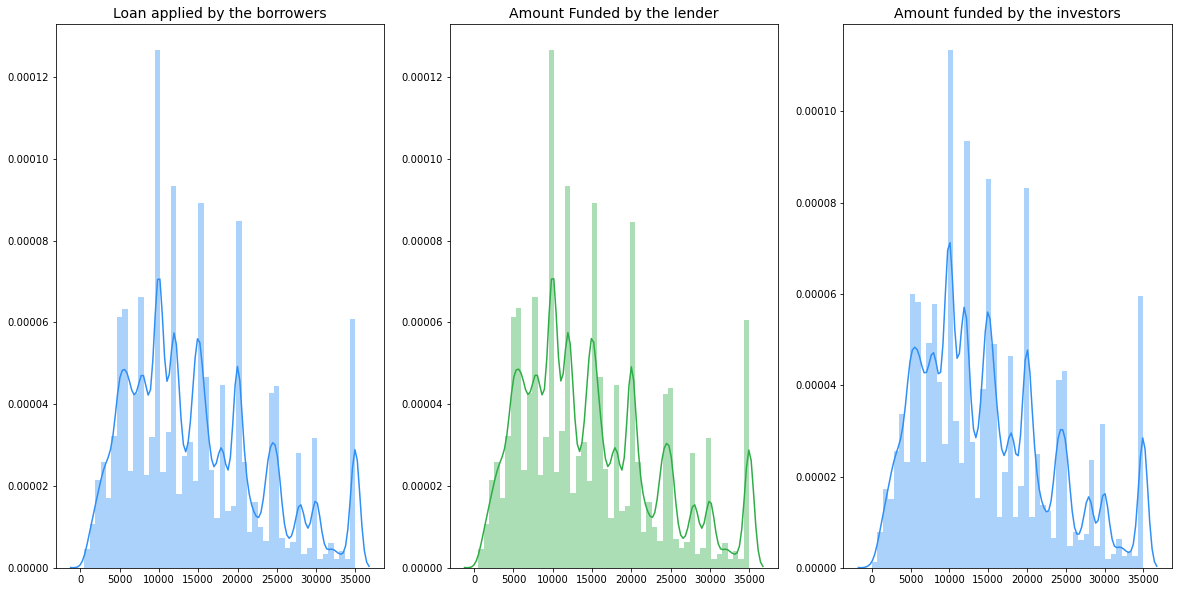

In [7]:
fig ,ax=plt.subplots(1,3,figsize=(20,10))

loan_amount=df["loan_amount"].values
funded_amount=df["funded_amount"].values
investor_funds=df["investor_funds"].values

sns.distplot(loan_amount,ax=ax[0],color="#2F8FF7")
ax[0].set_title("Loan applied by the borrowers",fontsize=14)

sns.distplot(funded_amount,ax=ax[1],color="#2EAD46")
ax[1].set_title("Amount Funded by the lender",fontsize=14)

sns.distplot(investor_funds,ax=ax[2],color="#2F8FF7")
ax[2].set_title("Amount funded by the investors",fontsize=14)



In [8]:
## Transfoeming the issues data by year
df["issue_d"]


0         Dec-2011
1         Dec-2011
2         Dec-2011
3         Dec-2011
4         Dec-2011
            ...   
887374    Jan-2015
887375    Jan-2015
887376    Jan-2015
887377    Jan-2015
887378    Jan-2015
Name: issue_d, Length: 887379, dtype: object

In [9]:
df_series=pd.to_datetime(df["issue_d"])
df_series

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
887374   2015-01-01
887375   2015-01-01
887376   2015-01-01
887377   2015-01-01
887378   2015-01-01
Name: issue_d, Length: 887379, dtype: datetime64[ns]

In [10]:
df["year"]=df_series.dt.year
df["year"]

0         2011
1         2011
2         2011
3         2011
4         2011
          ... 
887374    2015
887375    2015
887376    2015
887377    2015
887378    2015
Name: year, Length: 887379, dtype: int64

## Finding which year the loans issued were the highest


Text(0, 0.5, 'Amount of loan')

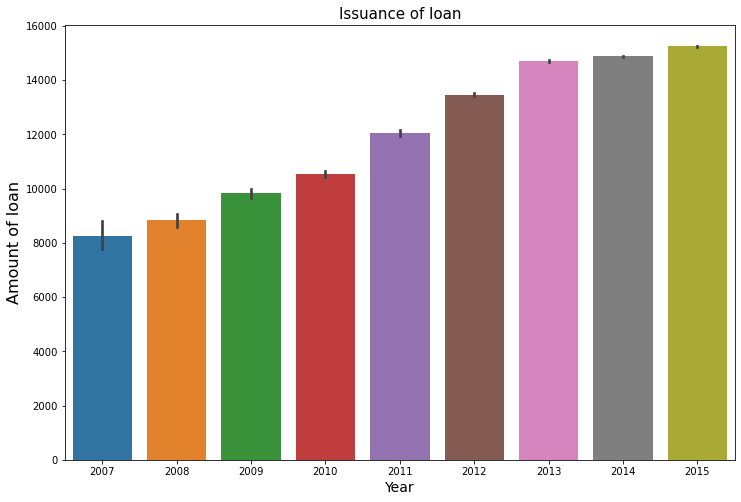

In [11]:
plt.figure(figsize=(12,8))
sns.barplot("year","loan_amount",data=df,palette='tab10')
plt.title("Issuance of loan",fontsize=15)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Amount of loan",fontsize=16)            

## Summary of the above analysis
1.Most loans were between 5000 and 20000

2.in the year 2015 most loans were issued showing growth in economy

3.Incremental increase in amount of loan issued means the economy is growing from 2007 to 2015

# Understanding Good and Bad Loans

In [12]:
df["loan_status"].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [13]:
# Understanding the loans which are bad
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]

df["loan_condition"]=np.nan

def loan_condition(status):
    if status in bad_loan:
       return "Bad loan"
    else: 
       return "Good loan"
df["loan_condition"]=df["loan_status"].apply(loan_condition)    

## Visualizing good and bad loans

Text(0, 0.5, '% of loan distribution with year')

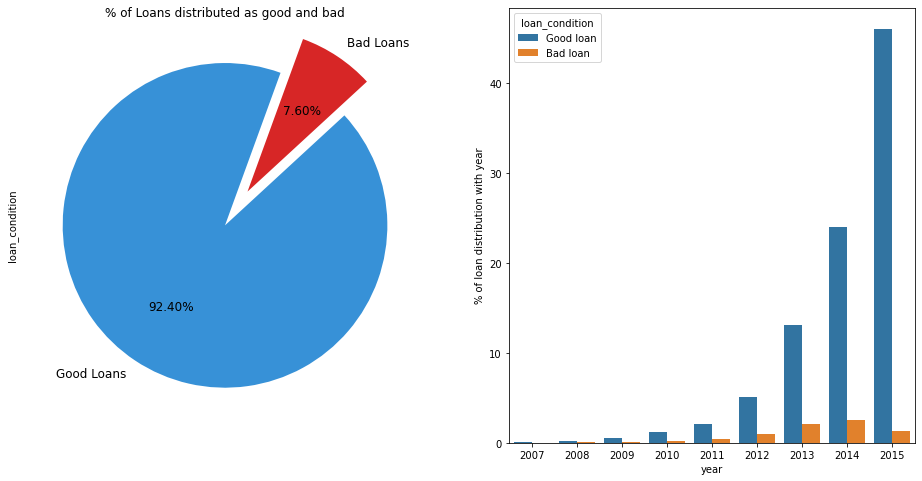

In [14]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

df["loan_condition"].value_counts().plot.pie(labels=labels,colors=colors,autopct='%1.2f%%',explode=[0,0.25],fontsize=12,
                                             ax=ax[0], startangle=70)
ax[0].set_title("% of Loans distributed as good and bad")


#plt.pie(df["loan_condition"].value_counts(),labels=labels,colors=colors,autopct='%1.2f%%')

sns.barplot(x="year",y="loan_amount",hue="loan_condition",data=df,ax=ax[1],estimator=lambda x: len(x) / len(df) * 100)
ax[1].set_ylabel("% of loan distribution with year")

## Loans issued By region

In [15]:
df['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

In [16]:
df["addr_state"].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME', 'ND'], dtype=object)

In [17]:
df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'

df['region'] = df['addr_state'].apply(finding_regions)

    

In [18]:
df["complete_date"]=pd.to_datetime(df["issue_d"])
df["complete_date"]

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
887374   2015-01-01
887375   2015-01-01
887376   2015-01-01
887377   2015-01-01
887378   2015-01-01
Name: complete_date, Length: 887379, dtype: datetime64[ns]

In [19]:
group_dates = df.groupby(['complete_date', 'region'], as_index=False).sum()
group_dates

,complete_date,region,loan_amount,funded_amount,investor_funds,interest_rate,installment,annual_income,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,year
0,2007-06-01,MidWest,6900.0,6900.0,825.0,27.35,218.89,1.416240e+05,28.97,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6021
1,2007-06-01,NorthEast,67700.0,67700.0,5450.0,161.88,2193.75,7.670000e+05,144.49,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32112
2,2007-06-01,SouthEast,13450.0,13450.0,525.0,28.93,432.46,3.380000e+05,25.38,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6021
3,2007-06-01,SouthWest,1200.0,1200.0,500.0,9.01,38.17,3.600000e+04,3.27,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007
4,2007-06-01,West,2600.0,2600.0,575.0,8.38,81.94,6.500000e+03,6.46,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,2015-12-01,MidWest,116029325.0,116029325.0,115969850.0,97024.02,3339077.03,5.842229e+08,159434.96,2769.0,...,242291.3,5190.0,10991.0,22529250.0,232107.6,266308677.0,4360.0,6463.0,9337.0,15946710
510,2015-12-01,NorthEast,156035925.0,156035925.0,155959600.0,125340.08,4502270.29,8.454208e+08,190094.45,4019.0,...,293785.3,6968.0,14985.0,29754374.0,291612.2,377537007.0,4298.0,5528.0,9381.0,20593300
511,2015-12-01,SouthEast,165034300.0,165034300.0,164940450.0,137883.79,4763584.61,8.553334e+08,222421.95,3808.0,...,345363.9,7544.0,16002.0,30463308.0,331374.8,376592976.0,5158.0,8163.0,9563.0,22392695
512,2015-12-01,SouthWest,83521575.0,83521575.0,83472375.0,66801.17,2423694.37,4.465048e+08,119759.90,1898.0,...,162590.8,3627.0,7806.0,15198129.0,158971.8,182752126.0,2743.0,4485.0,5752.0,10973690


In [20]:
df[(df["region"]=="MidWest") & (df["complete_date"]=="2007-06-01")]

,loan_amount,funded_amount,investor_funds,term,interest_rate,installment,grade,sub_grade,emp_length,home_ownership,...,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,year,loan_condition,region,complete_date
42516,1400.0,1400.0,475.0,36 months,10.91,45.78,C,C3,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,2007,Good loan,MidWest,2007-06-01
42519,2500.0,2500.0,225.0,36 months,7.43,77.69,A,A2,9 years,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,2007,Good loan,MidWest,2007-06-01
42526,3000.0,3000.0,125.0,36 months,9.01,95.42,B,B2,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,2007,Good loan,MidWest,2007-06-01


In [21]:
group_dates['issue_d'] = [month.to_period('M') for 
                          month in group_dates['complete_date']]
group_dates["issue_d"]

0      2007-06
1      2007-06
2      2007-06
3      2007-06
4      2007-06
        ...   
509    2015-12
510    2015-12
511    2015-12
512    2015-12
513    2015-12
Name: issue_d, Length: 514, dtype: object

In [22]:
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates

,issue_d,region,loan_amount,funded_amount,investor_funds,interest_rate,installment,annual_income,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,year
0,2007-06,MidWest,6900.0,6900.0,825.0,27.35,218.89,1.416240e+05,28.97,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6021
1,2007-06,NorthEast,67700.0,67700.0,5450.0,161.88,2193.75,7.670000e+05,144.49,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32112
2,2007-06,SouthEast,13450.0,13450.0,525.0,28.93,432.46,3.380000e+05,25.38,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6021
3,2007-06,SouthWest,1200.0,1200.0,500.0,9.01,38.17,3.600000e+04,3.27,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007
4,2007-06,West,2600.0,2600.0,575.0,8.38,81.94,6.500000e+03,6.46,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,2015-12,MidWest,116029325.0,116029325.0,115969850.0,97024.02,3339077.03,5.842229e+08,159434.96,2769.0,...,242291.3,5190.0,10991.0,22529250.0,232107.6,266308677.0,4360.0,6463.0,9337.0,15946710
510,2015-12,NorthEast,156035925.0,156035925.0,155959600.0,125340.08,4502270.29,8.454208e+08,190094.45,4019.0,...,293785.3,6968.0,14985.0,29754374.0,291612.2,377537007.0,4298.0,5528.0,9381.0,20593300
511,2015-12,SouthEast,165034300.0,165034300.0,164940450.0,137883.79,4763584.61,8.553334e+08,222421.95,3808.0,...,345363.9,7544.0,16002.0,30463308.0,331374.8,376592976.0,5158.0,8163.0,9563.0,22392695
512,2015-12,SouthWest,83521575.0,83521575.0,83472375.0,66801.17,2423694.37,4.465048e+08,119759.90,1898.0,...,162590.8,3627.0,7806.0,15198129.0,158971.8,182752126.0,2743.0,4485.0,5752.0,10973690


In [23]:
group_dates['loan_amount'] = group_dates['loan_amount']/1000
df_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amount']])

Text(0.5, 1.0, 'Loans issued by Region')

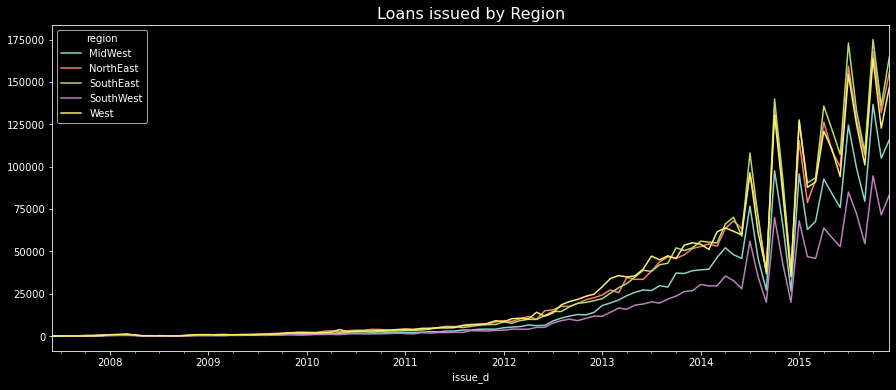

In [24]:
plt.style.use('dark_background')
cmap = plt.cm.Set3

by_issued_amount = df_dates.groupby(['issue_d', 'region']).loan_amount.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

In [25]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']


In [26]:
lst=[df]
lst
df['emp_length_int'] = np.nan
for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    print(col)

        loan_amount  funded_amount  investor_funds        term  interest_rate  \
0            5000.0         5000.0          4975.0   36 months          10.65   
1            2500.0         2500.0          2500.0   60 months          15.27   
2            2400.0         2400.0          2400.0   36 months          15.96   
3           10000.0        10000.0         10000.0   36 months          13.49   
4            3000.0         3000.0          3000.0   60 months          12.69   
...             ...            ...             ...         ...            ...   
887374      10000.0        10000.0         10000.0   36 months          11.99   
887375      24000.0        24000.0         24000.0   36 months          11.99   
887376      13000.0        13000.0         13000.0   60 months          15.99   
887377      12000.0        12000.0         12000.0   60 months          19.99   
887378      20000.0        20000.0         20000.0   36 months          11.99   

        installment grade s

In [27]:
# so these code is written so that wherever the emp_length is 10 years that row we will create a new column which will have value
# 10 so that we get a clean data 10 .so basically it is only for geeting clean numerical values rather than 10+years like that.
df.loc[col['emp_length'] == '10+ years',"emp_length_int"]=10
df

,loan_amount,funded_amount,investor_funds,term,interest_rate,installment,grade,sub_grade,emp_length,home_ownership,...,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,year,loan_condition,region,complete_date,emp_length_int
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,2011,Good loan,SouthWest,2011-12-01,10.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,2011,Bad loan,SouthEast,2011-12-01,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,2011,Good loan,MidWest,2011-12-01,10.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,2011,Good loan,West,2011-12-01,10.0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,2011,Good loan,West,2011-12-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,8 years,RENT,...,NaN,17100.0,NaN,NaN,NaN,2015,Good loan,West,2015-01-01,NaN
887375,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,10+ years,MORTGAGE,...,NaN,10200.0,NaN,NaN,NaN,2015,Good loan,NorthEast,2015-01-01,10.0
887376,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,5 years,RENT,...,NaN,18000.0,NaN,NaN,NaN,2015,Good loan,SouthEast,2015-01-01,NaN
887377,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,1 year,RENT,...,NaN,27000.0,NaN,NaN,NaN,2015,Good loan,NorthEast,2015-01-01,NaN


In [28]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0

## Loan issued by region and by credit score

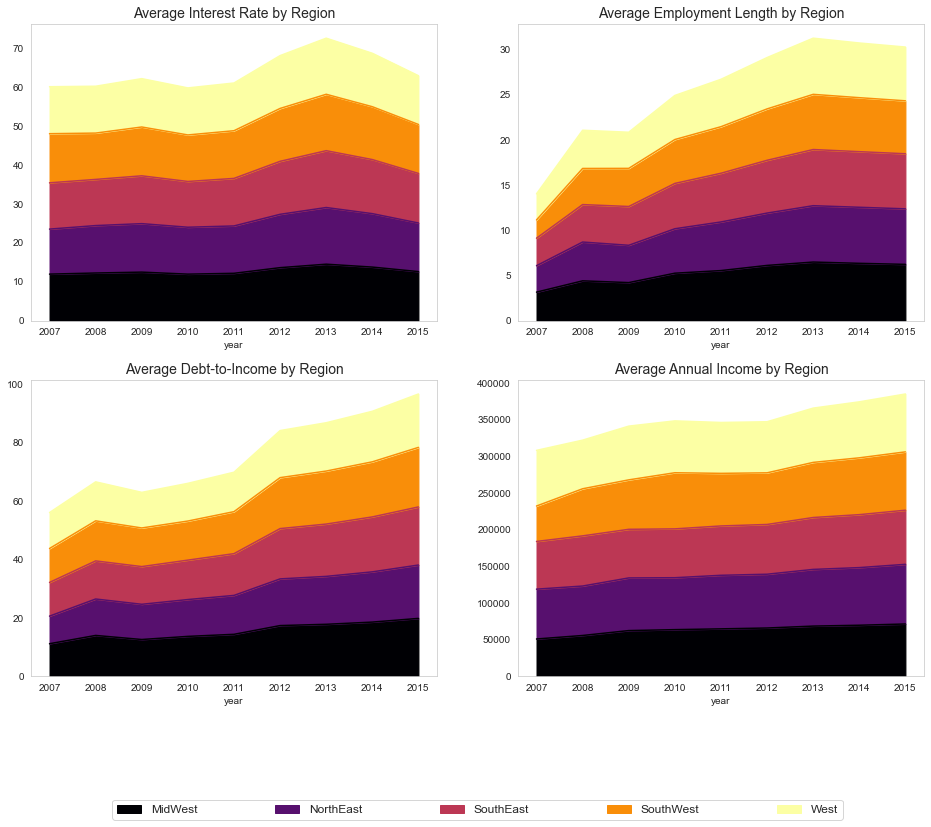

In [29]:
# Loan issued by Region and by Credit Score grade
# Change the colormap for tomorrow!

sns.set_style('whitegrid')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2) # To plot 4 figures 
cmap = plt.cm.inferno # For colormap inferno

by_interest_rate = df.groupby(['year', 'region']).interest_rate.mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest Rate by Region', fontsize=14)

by_employment_length = df.groupby(['year', 'region']).emp_length_int.mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employment Length by Region', fontsize=14)
# plt.xlabel('Year of Issuance', fontsize=14)

by_dti = df.groupby(['year', 'region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average Debt-to-Income by Region', fontsize=14)

by_income = df.groupby(['year', 'region']).annual_income.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Annual Income by Region', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)

In [30]:
by_interest_rate = df.groupby(['year', 'region',"interest_rate"]).mean()
by_interest_rate

loan_amount  funded_amount  investor_funds  \
year region  interest_rate                                                
2007 MidWest 7.43            4255.000000    4255.000000     1810.000000   
             7.75            5000.000000    5000.000000     1787.500000   
             8.07            7666.666667    7666.666667     1783.333333   
             8.38            3633.333333    3633.333333      516.666667   
             9.01            7500.000000    7500.000000      425.000000   
...                                  ...            ...             ...   
2015 West    27.49          30000.000000   30000.000000    30000.000000   
             27.88          20983.181818   20983.181818    20971.818182   
             27.99          19200.000000   19200.000000    19200.000000   
             28.49          18952.142857   18952.142857    18947.857143   
             28.99          21406.250000   21406.250000    21393.750000   

                            installment  annual_income        dti  \
year region  interest_rate                                          
2007 MidWest 7.43            132.228000   71324.800000   2.868000   
             7.75            156.110000  135000.000000   5.740000   
             8.07            240.486667  135666.666667   5.570000   
             8.38            114.500000   46333.333333  10.433333   
             9.01            238.540000   67835.695000   8.320000   
...                                 ...            ...        ...   
2015 West    27.49           924.870000  115000.000000  17.730000   
             27.88           655.868182   72829.672727  21.409273   
             27.99           597.700000   60000.000000  16.580000   
             28.49           607.050571   79388.198000  19.491429   
             28.99           680.725417   80517.500000  18.044583   

                            delinq_2yrs  inq_last_6mths  \
year region  interest_rate                                
2007 MidWest 7.43              0.000000        1.000000   
             7.75              0.000000        1.500000   
             8.07              0.000000        1.333333   
             8.38              0.000000        3.333333   
             9.01              0.000000        0.000000   
...                                 ...             ...   
2015 West    27.49             0.000000        2.000000   
             27.88             0.327273        1.290909   
             27.99             0.000000        2.000000   
             28.49             0.600000        1.428571   
             28.99             0.458333        1.083333   

                            mths_since_last_delinq  mths_since_last_record  \
year region  interest_rate                                                   
2007 MidWest 7.43                        16.000000                0.000000   
             7.75                        23.500000                0.000000   
             8.07                         0.000000                0.000000   
             8.38                         0.000000                0.000000   
             9.01                        62.000000              115.000000   
...                                            ...                     ...   
2015 West    27.49                             NaN                     NaN   
             27.88                       36.088235               63.789474   
             27.99                             NaN                     NaN   
             28.49                       33.652174               75.363636   
             28.99                       30.500000               83.400000   

                            ...     il_util  open_rv_12m  open_rv_24m  \
year region  interest_rate  ...                                         
2007 MidWest 7.43           ...         NaN          NaN          NaN   
             7.75           ...         NaN          NaN          NaN   
             8.07           ...         NaN          NaN          NaN   
       

In [31]:
by_interest_rate = df.groupby(['year', 'region',"interest_rate"]).mean()
by_interest_rate.unstack()

loan_amount                                          \
interest_rate          5.32         5.42         5.79          5.93    
year region                                                            
2007 MidWest             NaN          NaN          NaN           NaN   
     NorthEast           NaN          NaN          NaN           NaN   
     SouthEast           NaN          NaN          NaN           NaN   
     SouthWest           NaN          NaN          NaN           NaN   
     West                NaN          NaN          NaN           NaN   
2008 MidWest             NaN          NaN          NaN           NaN   
     NorthEast           NaN          NaN          NaN           NaN   
     SouthEast           NaN          NaN          NaN           NaN   
     SouthWest           NaN          NaN          NaN           NaN   
     West                NaN          NaN          NaN           NaN   
2009 MidWest             NaN          NaN          NaN           NaN   
     NorthEast           NaN          NaN          NaN           NaN   
     SouthEast           NaN          NaN          NaN           NaN   
     SouthWest           NaN          NaN          NaN           NaN   
     West                NaN          NaN          NaN           NaN   
2010 MidWest             NaN  6314.285714  8816.071429           NaN   
     NorthEast           NaN  7485.000000  8713.000000           NaN   
     SouthEast           NaN  7915.909091  8549.324324           NaN   
     SouthWest           NaN  6666.666667  8485.000000           NaN   
     West                NaN  7550.000000  8180.813953           NaN   
2011 MidWest             NaN  6744.277108  6958.333333           NaN   
     NorthEast           NaN  6249.615385  7228.819444           NaN   
     SouthEast           NaN  6237.804878  6625.423729           NaN   
     SouthWest           NaN  6081.666667  7503.703704           NaN   
     West                NaN  7062.800000  8027.976190           NaN   
2012 MidWest             NaN          NaN          NaN           NaN   
     NorthEast           NaN          NaN          NaN           NaN   
     SouthEast           NaN          NaN          NaN           NaN   
     SouthWest           NaN          NaN          NaN           NaN   
     West                NaN          NaN          NaN           NaN   
2013 MidWest             NaN          NaN          NaN           NaN   
     NorthEast           NaN          NaN          NaN           NaN   
     SouthEast           NaN          NaN          NaN           NaN   
     SouthWest           NaN          NaN          NaN           NaN   
     West                NaN          NaN          NaN           NaN   
2014 MidWest             NaN          NaN          NaN           NaN   
     NorthEast           NaN          NaN          NaN           NaN   
     SouthEast           NaN          NaN          NaN           NaN   
     SouthWest           NaN          NaN          NaN           NaN   
     West                NaN          NaN          NaN           NaN   
2015 MidWest    14167.645429          NaN          NaN  14214.879357   
     NorthEast  14564.839080          NaN          NaN  14530.737705   
     SouthEast  14528.393761          NaN          NaN  13952.067669   
     SouthWest  15115.086562          NaN          NaN  14877.978723   
     West       14817.976989          NaN          NaN  14674.140212   

                                                                       \
interest_rate         5.99          6.00          6.03          6.17    
year region                                                             
2007 MidWest            NaN           NaN           NaN           NaN   
     NorthEast          NaN           NaN           NaN           NaN   
     SouthEast          NaN           NaN           NaN           NaN   
     SouthWest          NaN           NaN           NaN           NaN   
     West               NaN           NaN        

## Deeper look into Bad Loans

The number of loans that were classified as bad loans for each region by its loan status. (This will be shown in a dataframe below.)

This won't give us the exact reasons why a loan is categorized as a bad loan (other variables that might have influence the condition of the loan) but it will give us a deeper insight on the level of risk in a particular region.

In [32]:
bad_loans_df= df.loc[df["loan_condition"]== "Bad Loan"]

# Loan status cross tab
#loan_status_cross=pd.crosstab(bad_loans_df["region"],bad_loans_df["loan_status"]).apply(lambda x: x/x.sum() * 100)
#loan_status_cross

loan_status_cross = pd.crosstab(bad_loans_df["region"], bad_loans_df["loan_status"]).apply(lambda x: x/x.sum() * 100)
loan_status_cross

""


In [33]:
# We have 67429 loans categorized as bad loans
badloans_df = df.loc[df["loan_condition"] == "Bad loan"]

# loan_status cross
loan_status_cross = pd.crosstab(badloans_df['region'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100)



loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['Does not meet the credit policy. Status:Charged Off'] = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))

loan_status_cross # it will give us a table where we have percentage of loans which are charged off in midwest ,northeast,etc
# as well as percentage of default in midwest, northeast,etc.

loan_status,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days)
region,,,,,,
MidWest,16.27,14.36,18.66,14.81,15.02,15.70
NorthEast,23.58,21.58,24.97,25.99,24.82,24.15
SouthEast,24.52,24.36,24.18,25.25,25.46,25.24
SouthWest,10.55,13.62,10.38,11.32,11.58,12.14
West,25.08,26.09,21.81,22.63,23.12,22.78


In [34]:
number_of_loanstatus = pd.crosstab(badloans_df['region'], badloans_df['loan_status'])
number_of_loanstatus

number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 
# number_of_badloans
number_of_loanstatus # It will give the count of loans charged off Default and so on in midwest,Northeast,Southeast,Southwest

loan_status,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days),Total
region,,,,,,,
MidWest,7361,175,142,926,354,1820,10778
NorthEast,10671,263,190,1625,585,2799,16133
SouthEast,11094,297,184,1579,600,2925,16679
SouthWest,4774,166,79,708,273,1407,7407
West,11348,318,166,1415,545,2640,16432


In [35]:
charged_off = loan_status_cross['Charged Off'].values.tolist()
default = loan_status_cross['Default'].values.tolist()
not_meet_credit = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].values.tolist()
grace_period = loan_status_cross['In Grace Period'].values.tolist()
short_pay = loan_status_cross['Late (16-30 days)'] .values.tolist()
long_pay = loan_status_cross['Late (31-120 days)'].values.tolist()

In [36]:
## We convert the long format data into short format data by suing groupby and unstack and then plot it using plotly.here we provided
# x values to be regions and y values to be a list of values of charged off,defualts corresponding values for that region.
# plotly is mainlu used for such good interactive fonts.


charged = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= charged_off,
    name='Charged Off',
    marker=dict(
        color='rgb(192, 148, 246)'
    ),
    text = '%'
)

defaults = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y=default,
    name='Defaults',
    marker=dict(
        color='rgb(176, 26, 26)'
    ),
    text = '%'
)

credit_policy = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= not_meet_credit,
    name='Does not meet Credit Policy',
    marker = dict(
        color='rgb(229, 121, 36)'
    ),
    text = '%'
)

grace = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= grace_period,
    name='Grace Period',
    marker = dict(
        color='rgb(147, 147, 147)'
    ),
    text = '%'
)

short_pays = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= short_pay,
    name='Late Payment (16-30 days)', 
    marker = dict(
        color='rgb(246, 157, 135)'
    ),
    text = '%'
)

long_pays = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= long_pay,
    name='Late Payment (31-120 days)',
    marker = dict(
        color = 'rgb(238, 76, 73)'
        ),
    text = '%'
)




data = [charged, defaults, credit_policy, grace, short_pays, long_pays]
layout = go.Layout(
    barmode='stack',
    title = '% of Bad Loan Status by Region',
    xaxis=dict(title='US Regions')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

## Understanding the operative side of business

Now we will have a closer look at the operative side of business by state. This will give us a clearer idea in which state we have a higher operating activity. This will allow us to ask further questions such as Why do we have a higher level of operating activity in this state? Could it be because of economic factors? or the risk level is low and returns are fairly decent? Let's explore!

# We will focus on three key metrics: 

1.Loans issued by state (Total Sum), 

2.Average interest rates charged to customers and 

3.average annual income of all customers by state.

The purpose of this analysis is to see states that give high returns at a descent risk.

In [37]:
# Grouping by our metrics
# First Plotly Graph (We evaluate the operative side of the business)
by_loan_amount = df.groupby(['region','addr_state'], as_index=False).loan_amount.sum()
by_interest_rate = df.groupby(['region', 'addr_state'], as_index=False).interest_rate.mean()
by_income = df.groupby(['region', 'addr_state'], as_index=False).annual_income.mean()

states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amount'].values.tolist()
average_interest_rates = by_interest_rate['interest_rate'].values.tolist()
average_annual_income = by_income['annual_income'].values.tolist()

from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income)])
                     

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()



# Think of a way to add default rate
# Consider adding a few more metrics for the future

,state_codes,issued_loans,interest_rate,annual_income
0,IA,114075.0,12.63,44756.21
1,IL,539068450.0,13.10,76898.22
2,IN,202493900.0,13.46,67989.31
3,KS,116395875.0,13.28,68841.31
4,MI,326467800.0,13.30,69378.67


In [38]:
# Now it comes the part where we plot out plotly United States map
import plotly.plotly as py
import plotly.graph_objs as go


for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)
    
scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['state_codes'] + '<br>' +\
'Average loan interest rate: ' + metrics_df['interest_rate'] + '<br>'+\
'Average annual income: ' + metrics_df['annual_income'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['state_codes'],
        z = metrics_df['issued_loans'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]


layout = dict(
    title = 'Lending Clubs Issued Loans <br> (A Perspective for the Business Operations)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

Analysis by Income Category:

In this section we will create different income categories in order to detect important patters and go more into depth in our analysis.

What we need to know:

Low income category: Borrowers that have an annual income lower or equal to 100,000 usd.

Medium income category: Borrowers that have an annual income higher than 100,000 usd but lower or equal to 200,000 usd.

High income category: Borrowers that have an annual income higher tha 200,000 usd.

In [39]:
# Let's create categories for annual_income since most of the bad loans are located below 100k

df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_income'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_income'] > 100000) & (col['annual_income'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_income'] > 200000, 'income_category'] = 'High'

In [41]:
lst = [df]
df['loan_condition_int'] = np.nan

for col in lst:
    col.loc[df['loan_condition'] == 'Good Loan', 'loan_condition_int'] = 0 # Negative (Bad Loan)
    col.loc[df['loan_condition'] == 'Bad Loan', 'loan_condition_int'] = 1 # Positive (Good Loan)
    
# Convert from float to int the column (This is our label)  
#df['loan_condition_int'] = df['loan_condition_int'].astype(int)
df["loan_condition_int"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
887374   NaN
887375   NaN
887376   NaN
887377   NaN
887378   NaN
Name: loan_condition_int, Length: 887379, dtype: float64

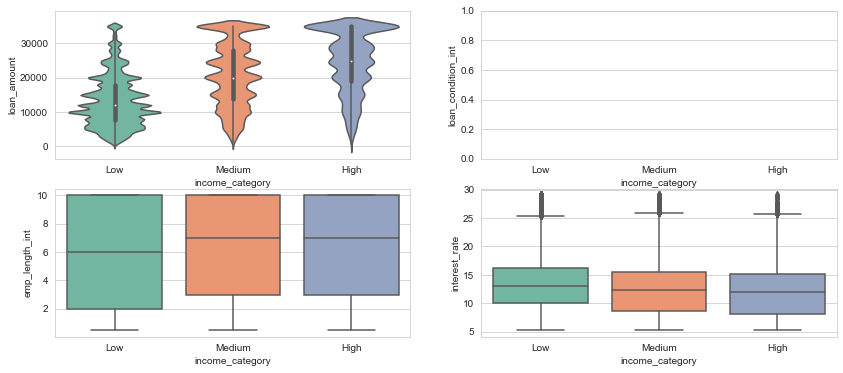

In [43]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

# Change the Palette types tomorrow!

sns.violinplot(x="income_category", y="loan_amount", data=df, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="loan_condition_int", data=df, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="emp_length_int", data=df, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="interest_rate", data=df, palette="Set2", ax=ax4)

## Understanding the Risky side of Business

Although the operative side of business is important, we have to also analyze the level of risk in each state. Credit scores are important metrics to analyze the level of risk of an individual customer. Other important metrics to somehow estimate the level of risk of other states.

1.Debt-to-income is an important metric since it says approximately the level of debt of each individual consumer with respect to its total income.

2.The average length of employment tells us a better story about the labor market in each state which is helpful to assess the levelof risk.

In [54]:
by_condition = df.groupby('addr_state')["loan_condition"].value_counts()
by_condition

addr_state  loan_condition
AK          Good loan          2054
            Bad loan            151
AL          Good loan         10207
            Bad loan            993
AR          Good loan          6133
                              ...  
WI          Bad loan            779
WV          Good loan          4122
            Bad loan            264
WY          Good loan          1911
            Bad loan            117
Name: loan_condition, Length: 102, dtype: int64

In [55]:
df.groupby('addr_state')['loan_condition'].count()

addr_state
AK      2205
AL     11200
AR      6640
AZ     20412
CA    129517
CO     18807
CT     13531
DC      2432
DE      2511
FL     60935
GA     29085
HI      4570
IA        14
ID        12
IL     35476
IN     13789
KS      7926
KY      8550
LA     10587
MA     20593
MD     21031
ME       525
MI     22985
MN     15957
MO     14207
MS      3819
MT      2558
NC     24720
ND       479
NE      1176
NH      4294
NJ     33256
NM      4939
NV     12443
NY     74086
OH     29631
OK      8085
OR     10893
PA     31393
RI      3893
SC     10639
SD      1815
TN     12887
TX     71138
UT      6264
VA     26255
VT      1797
WA     19434
WI     11574
WV      4386
WY      2028
Name: loan_condition, dtype: int64

In [56]:
by_condition = df.groupby('addr_state')['loan_condition'].value_counts()/ df.groupby('addr_state')['loan_condition'].count()

In [58]:
by_emp_length = df.groupby(['region', 'addr_state'], as_index=False).emp_length_int.mean()
by_emp_length

,region,addr_state,emp_length_int
0,MidWest,IA,3.464286
1,MidWest,IL,6.061377
2,MidWest,IN,6.398415
3,MidWest,KS,6.249337
4,MidWest,MI,6.432525
5,MidWest,MN,5.979750
6,MidWest,MO,6.232313
7,MidWest,ND,5.095494
8,MidWest,NE,5.848981
9,MidWest,OH,6.377049


In [69]:
by_emp_length = df.groupby(['region', 'addr_state','emp_length_int']).mean()
by_emp_length

loan_amount  funded_amount  \
region  addr_state emp_length_int                                
MidWest IA         0.5              7400.000000    6975.000000   
                   1.0              9408.333333    9408.333333   
                   2.0              7000.000000    7000.000000   
                   3.0             10100.000000   10100.000000   
                   4.0              1850.000000    1850.000000   
...                                         ...            ...   
West    WY         6.0             14934.873950   14934.873950   
                   7.0             14128.409091   14128.409091   
                   8.0             15114.655172   15114.655172   
                   9.0             15934.810127   15859.493671   
                   10.0            16825.714286   16825.714286   

                                   investor_funds  interest_rate  installment  \
region  addr_state emp_length_int                                               
MidWest IA         0.5                2400.001955      14.743333   240.690000   
                   1.0                5319.040000      12.870000   309.926667   
                   2.0                3250.000000      11.340000   230.300000   
                   3.0                4952.868057      13.870000   343.165000   
                   4.0                1575.000000       7.120000    57.230000   
...                                           ...            ...          ...   
West    WY         6.0               14925.840336      14.015126   454.553866   
                   7.0               14117.992424      13.405833   427.282197   
                   8.0               15110.344828      13.197500   451.593534   
                   9.0               15854.746835      14.106709   459.839494   
                   10.0              16783.896498      13.089143   489.191263   

                                   annual_income        dti  delinq_2yrs  \
region  addr_state emp_length_int                                          
MidWest IA         0.5              44197.000000  18.896667     0.000000   
                   1.0              50666.666667   9.696667     1.000000   
                   2.0              45000.000000   9.920000     0.000000   
                   3.0              32000.000000   3.795000     0.000000   
                   4.0              35000.000000  11.590000     0.000000   
...                                          ...        ...          ...   
West    WY         6.0              68249.374286  19.850084     0.210084   
                   7.0              67211.257576  20.073636     0.303030   
                   8.0              74091.591983  19.956034     0.215517   
                   9.0              74057.208608  21.772152     0.227848   
                   10.0             88022.900226  19.582286     0.356391   

                                   inq_last_6mths  mths_since_last_delinq  \
region  addr_state emp_length_int                                           
MidWest IA         0.5                   1.333333                     NaN   
                   1.0                   0.333333                9.666667   
                   2.0                   1.000000               70.000000   
                   3.0                   3.500000               43.500000   
                   4.0                   0.000000                0.000000   
...                                           ...                     ...   
West    WY         6.0                   0.840336               43.196078   
                   7.0                   0.659091               32.507937   
                   8.0                   0.818966               38.020000   
                   9.0                   0.430380               36.843750   
                   10.0                  0.596992               35.027108   

                                   ...  open_rv_12m  open_rv_24m   max_bal_bc  \
region  addr_state emp_length_int  ...             

In [70]:
df["emp_length_int"]

0         10.0
1          0.5
2         10.0
3         10.0
4          1.0
          ... 
887374     8.0
887375    10.0
887376     5.0
887377     1.0
887378    10.0
Name: emp_length_int, Length: 887379, dtype: float64

In [71]:
## so from these we get to know that when we are grouping by in bracket we put emp_length_int then the entire dataframe will 
## be there and by the values of emp_length_int ex.0.5,1,2,3,.....10 all numerical columns mean value will be calculated for ex
## the loan amount column for all values of emp_length_int=0.5 will be meaned 

## But when we mean by taking emp_length_int.mean() it means that we want the mean values of emp_length_int for each address and
## region so those all values 0,1,2,3,4,5....10 will be meaned and that value is shown

In [73]:
loan_condition_bystate = pd.crosstab(df['addr_state'], df['loan_condition'] )
loan_condition_bystate

loan_condition,Bad loan,Good loan
addr_state,,
AK,151,2054
AL,993,10207
AR,507,6133
AZ,1581,18831
CA,10518,118999
CO,1187,17620
CT,922,12609
DC,118,2314
DE,189,2322
